In [1]:
##Name -- Rishav Kumar
##Roll No -- m22ai613

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Define the paths to your image and csv folders
train_val_dir = "C:\\Users\\rsa33\\OneDrive\\Desktop\\Chart Image Classfication\\train_val"
test_dir = "C:\\Users\\rsa33\\OneDrive\\Desktop\\Chart Image Classfication\\test"
train_path_labels = "C:\\Users\\rsa33\\OneDrive\\Desktop\\Chart Image Classfication\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [3]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [4]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy') 

In [5]:
x_train.shape

(1000, 128, 128, 3)

In [6]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [7]:
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy') 


In [8]:
x_test.shape

(50, 128, 128, 3)

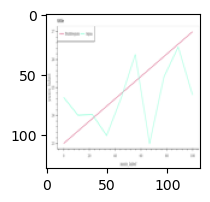

In [9]:

# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [10]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

In [11]:
y_train

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [12]:
y_train.shape

(1000,)

In [13]:
y_test.shape

(50,)

In [14]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

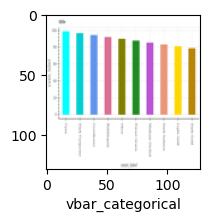

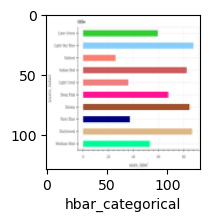

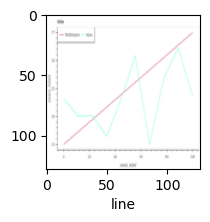

In [15]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [16]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [17]:
x_test.shape

(1000, 128, 128, 3)

In [18]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [19]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [20]:
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])


In [21]:
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 11s 324ms/step - loss: 5.4377 - accuracy: 0.1980
Epoch 2/10
32/32 [==============================] - 11s 338ms/step - loss: 1.6198 - accuracy: 0.2060
Epoch 3/10
32/32 [==============================] - 10s 323ms/step - loss: 1.6198 - accuracy: 0.2530
Epoch 4/10
32/32 [==============================] - 10s 325ms/step - loss: 1.5938 - accuracy: 0.2570
Epoch 5/10
32/32 [==============================] - 10s 320ms/step - loss: 1.5659 - accuracy: 0.3050
Epoch 6/10
32/32 [==============================] - 11s 345ms/step - loss: 1.5679 - accuracy: 0.2800
Epoch 7/10
32/32 [==============================] - 11s 352ms/step - loss: 1.5711 - accuracy: 0.2470
Epoch 8/10
32/32 [==============================] - 11s 342ms/step - loss: 1.5557 - accuracy: 0.3010
Epoch 9/10
32/32 [==============================] - 11s 329ms/step - loss: 1.5956 - accuracy: 0.2740
Epoch 10/10
32/32 [==============================] - 10s 326ms/step - loss: 1.5481 - accura

In [23]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [24]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 1s 70ms/step - loss: 1.7910 - accuracy: 0.1625


[1.7910292148590088, 0.16249999403953552]

In [25]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

5/5 [==============================] - 0s 72ms/step


In [26]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (640, 128, 128, 3)
Train Labels Shape: (640,)
Test Images Shape: (160, 128, 128, 3)
Test Labels Shape: (160,)


In [27]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])


In [30]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 1.6274 - accuracy: 0.2188 - val_loss: 1.9670 - val_accuracy: 0.1625
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 1.9039 - accuracy: 0.2031 - val_loss: 1.6877 - val_accuracy: 0.1750
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 1.6864 - accuracy: 0.2094 - val_loss: 1.6030 - val_accuracy: 0.3187
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 1.6319 - accuracy: 0.3578 - val_loss: 1.5603 - val_accuracy: 0.2438
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 1.5857 - accuracy: 0.2328 - val_loss: 1.5306 - val_accuracy: 0.3125
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 1.5449 - accuracy: 0.2750 - val_loss: 1.5052 - val_accuracy: 0.3313
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 1.5090 - accuracy: 0.3172 - val_loss: 1.4861 - val_accuracy: 0.3875
Epoch 8/50
1/1 [=======================

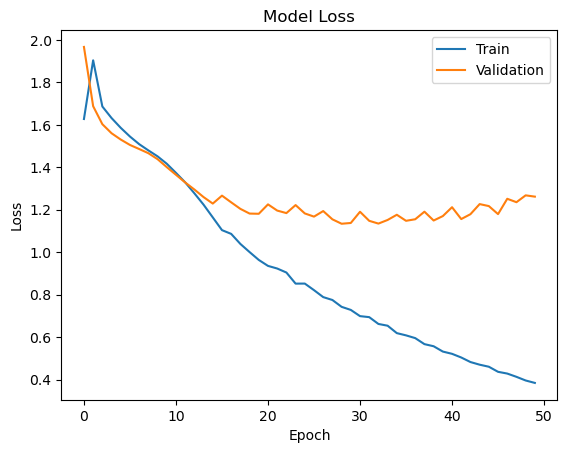

In [29]:
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

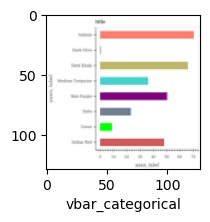

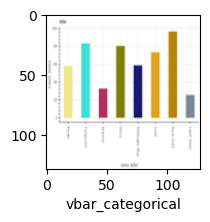

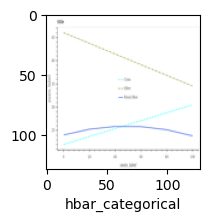

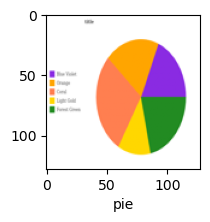

In [31]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [ ]:
# Observation: we can see some wrong predictions

In [32]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

5/5 [==============================] - 0s 29ms/step


array([[6.1072479e-04, 1.2070247e-02, 4.4129974e-05, 5.6201759e-05,
        9.8721868e-01],
       [4.6979892e-03, 1.1061527e-03, 1.3301522e-01, 8.5451514e-01,
        6.6655744e-03],
       [3.1608361e-05, 1.5910053e-04, 2.7505109e-01, 7.2455978e-01,
        1.9848724e-04],
       [3.8350353e-01, 2.5326751e-02, 8.9291641e-03, 1.2514551e-02,
        5.6972599e-01],
       [5.2450925e-01, 4.8720822e-02, 7.0414089e-02, 5.5638850e-03,
        3.5079196e-01]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[4, 3, 3, 4, 0]

In [35]:
y_test[:5]

array([4, 3, 2, 4, 4])

In [36]:
# here we see some values are not matching

'vbar_categorical'

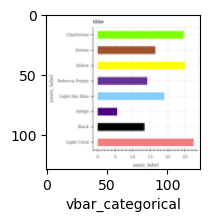

In [37]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [38]:
# some values are not matching

In [39]:
print("classification report: \n", classification_report(y_test,y_classes))


classification report: 
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        40
           1       0.71      0.85      0.77        26
           2       0.48      0.39      0.43        31
           3       0.61      0.54      0.58        35
           4       0.69      0.79      0.73        28

    accuracy                           0.64       160
   macro avg       0.63      0.65      0.64       160
weighted avg       0.63      0.64      0.63       160



In [40]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[27  4  1  2  6]
 [ 0 22  1  2  1]
 [11  1 12  7  0]
 [ 1  1 11 19  3]
 [ 2  3  0  1 22]]


Text(95.72222222222221, 0.5, 'Actual')

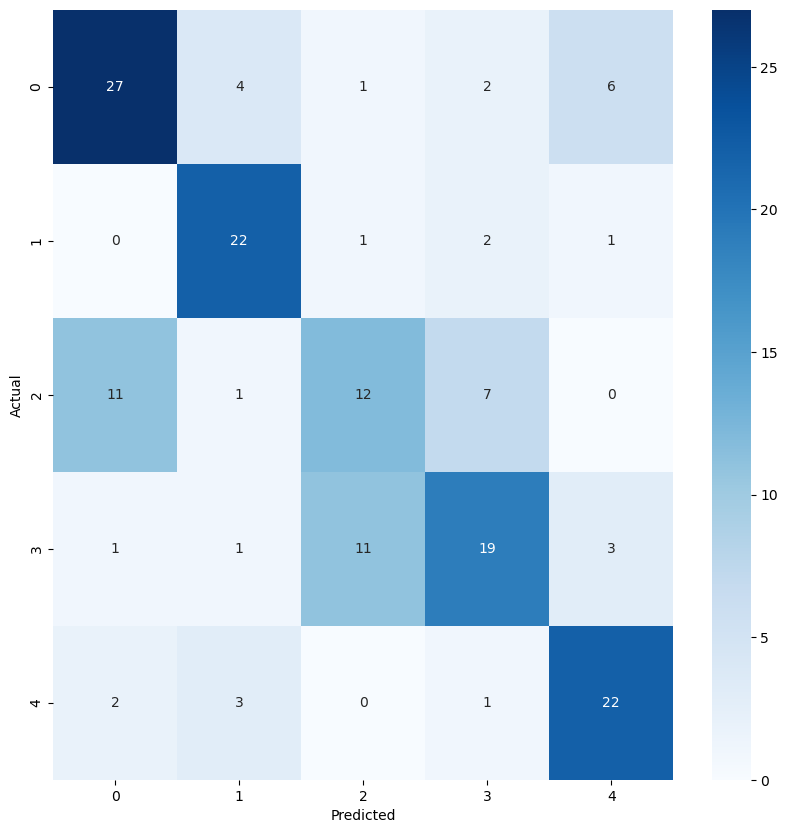

In [41]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is an error

In [42]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [43]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [44]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
 layer.trainable = False

In [45]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [49]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [51]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

5/5 [==============================] - 3s 150ms/step - loss: 1.6061 - accuracy: 0.2500


In [52]:
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.25
Test loss: 1.606140375137329
